In [9]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, execute, Aer, QuantumRegister, ClassicalRegister, BasicAer
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_ibm_provider import IBMProvider
 # Loading your IBM Q account (s)
provider = IBMProvider ()

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [14]:
def cccz(circuit, control0, control1, control2, target):
    circuit.h(target)
    circuit.mct([control0, control1, control2], target)
    circuit.h(target)

In [15]:
def phase_oracle(circuit, registers):
    cccz(circuit, registers[0], registers[1], registers[2], registers[3])

In [16]:
def grover_diffusion(circuit, registers):
    circuit.h(registers)
    circuit.x(registers)
    circuit.barrier()
    cccz(circuit, registers[0], registers[1], registers[2], registers[3])
    circuit.barrier()
    circuit.x(registers)
    circuit.h(registers)

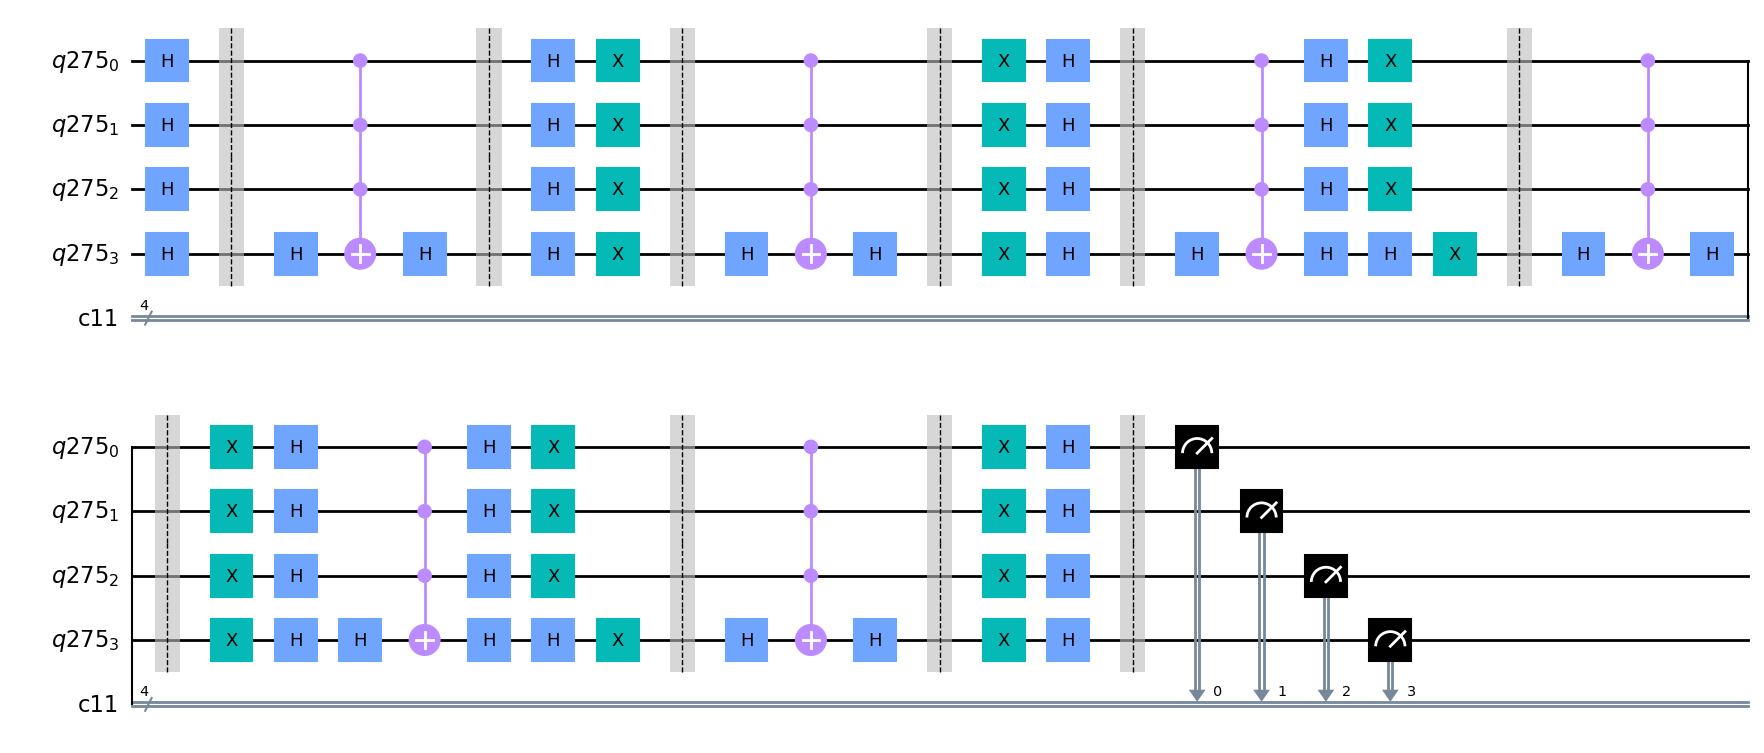

In [71]:
Qubits = 4
tests = 1

qr = QuantumRegister(Qubits)
cr = ClassicalRegister(Qubits)
groverCircuit = QuantumCircuit(qr, cr)

#groverCircuit.reset(qr)

groverCircuit.h(qr)

for test in range(0, tests):
    groverCircuit.barrier()
    phase_oracle(groverCircuit, qr)
    groverCircuit.barrier()
    grover_diffusion(groverCircuit, qr)
    groverCircuit.barrier()
    phase_oracle(groverCircuit, qr)
    grover_diffusion(groverCircuit, qr)
    phase_oracle(groverCircuit, qr)
    grover_diffusion(groverCircuit, qr)
    
    
    
    
    
    #oracle(groverCircuit, qr)
    #diffusion(groverCircuit, qr)
    
    
    
groverCircuit.barrier()
groverCircuit.measure(qr, cr)

groverCircuit.draw(output = 'mpl')
    




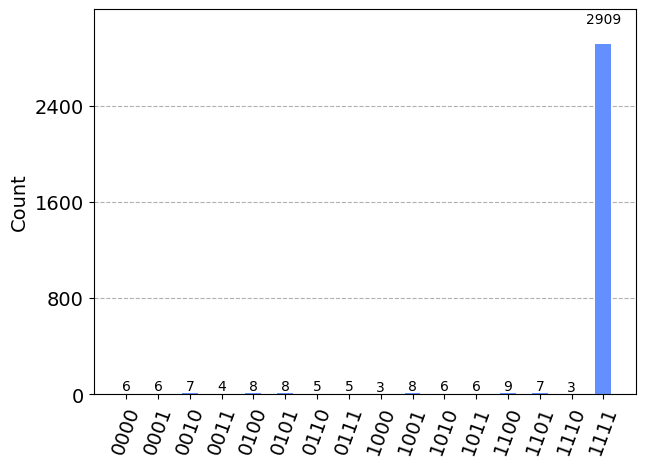

In [78]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 3000

results = execute(groverCircuit, backend = backend, shots = shots).result()
answer = results.get_counts()
plot_histogram(answer)